In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings('ignore', category=FutureWarning, module='pandas')

In [2]:
df = pd.read_csv("diabetes.csv")

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


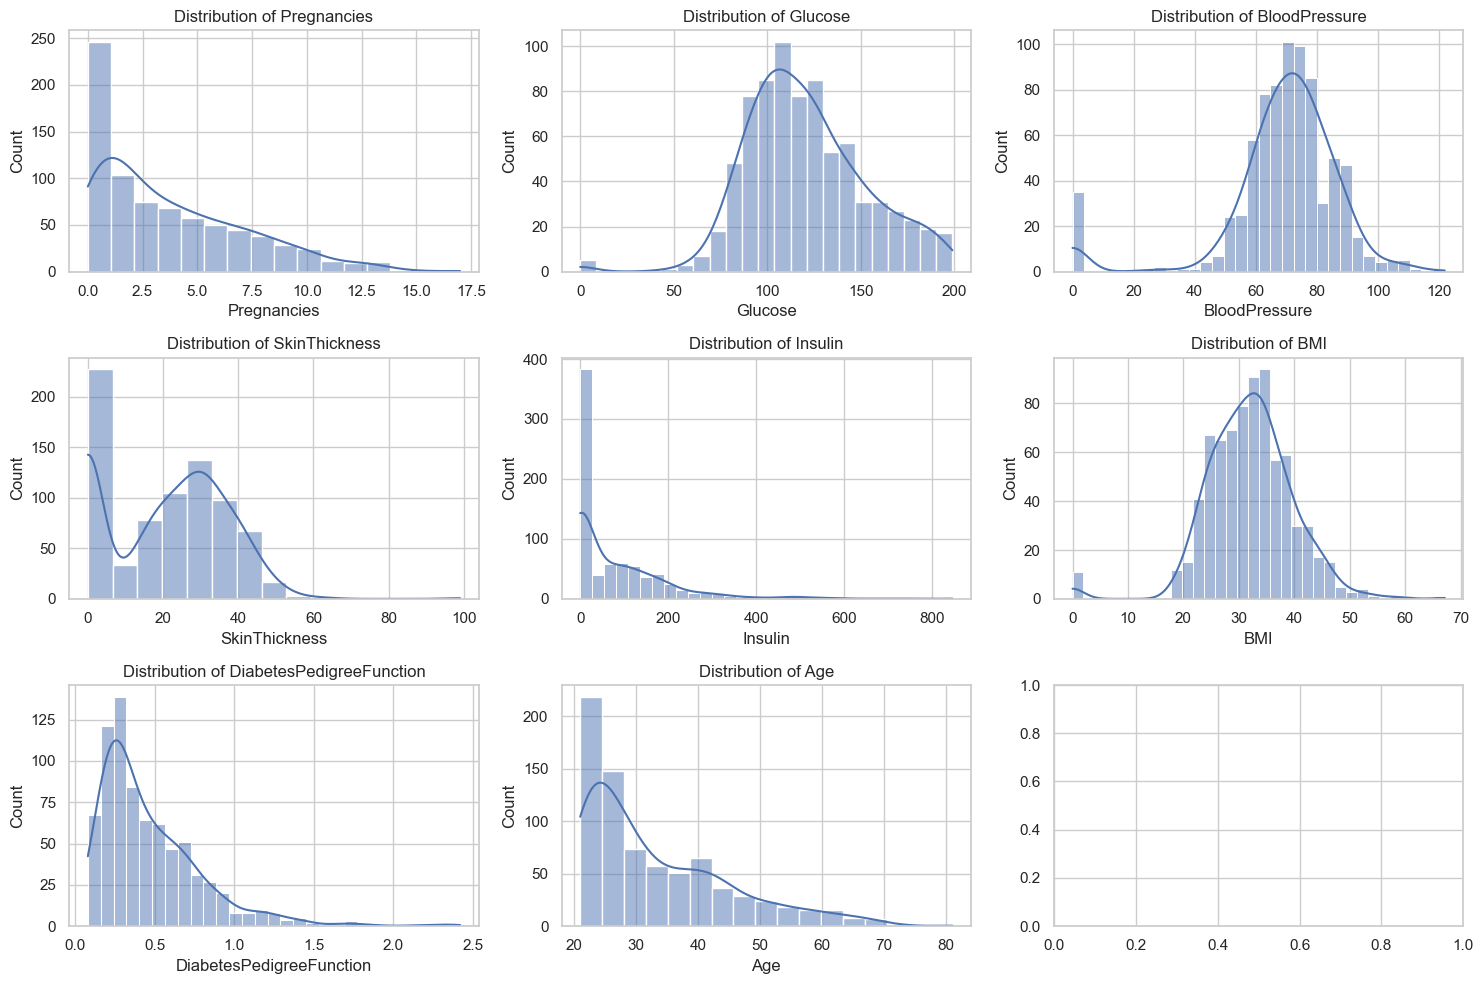

In [4]:
sns.set(style="whitegrid")

# Create a figure and axis for the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop through each column (excluding the 'Outcome' column)
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

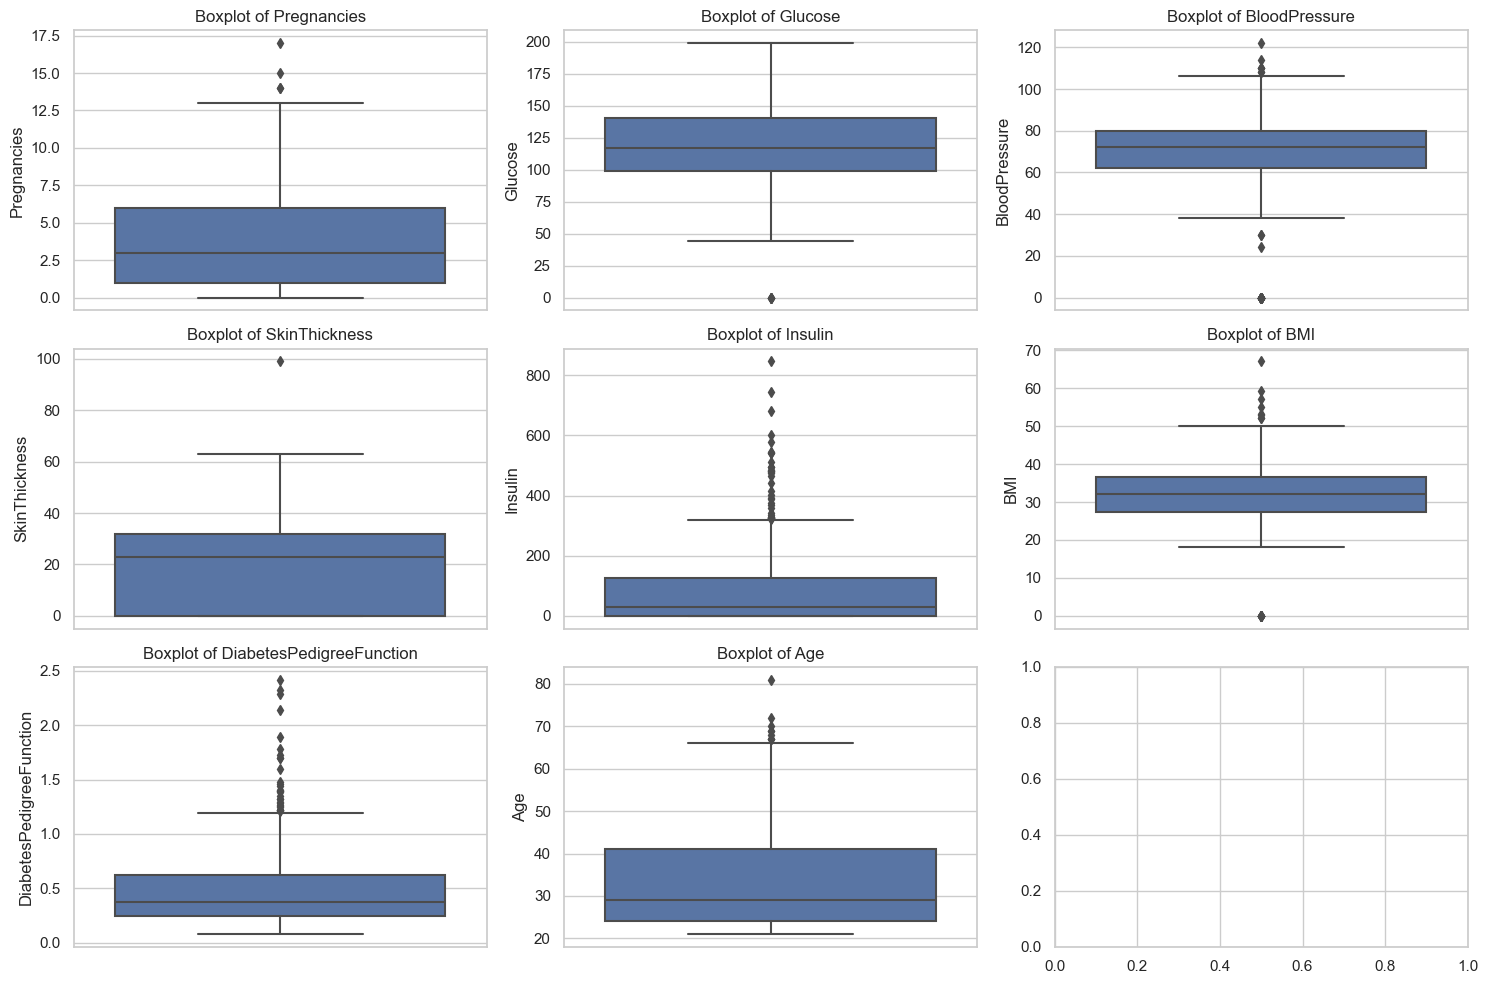

In [5]:
# Create a figure and axis for the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()   

# Loop through each column (excluding the 'Outcome' column)
for i, column in enumerate(df.columns):
    # Exclude the 'Outcome' column
    if column != 'Outcome':
        # Create a boxplot for the current column
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')
        
# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [6]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, float('nan'))
missing_values = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].isnull().sum()
print(missing_values)

df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [7]:
missing_values = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].isnull().sum()
print(missing_values)

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


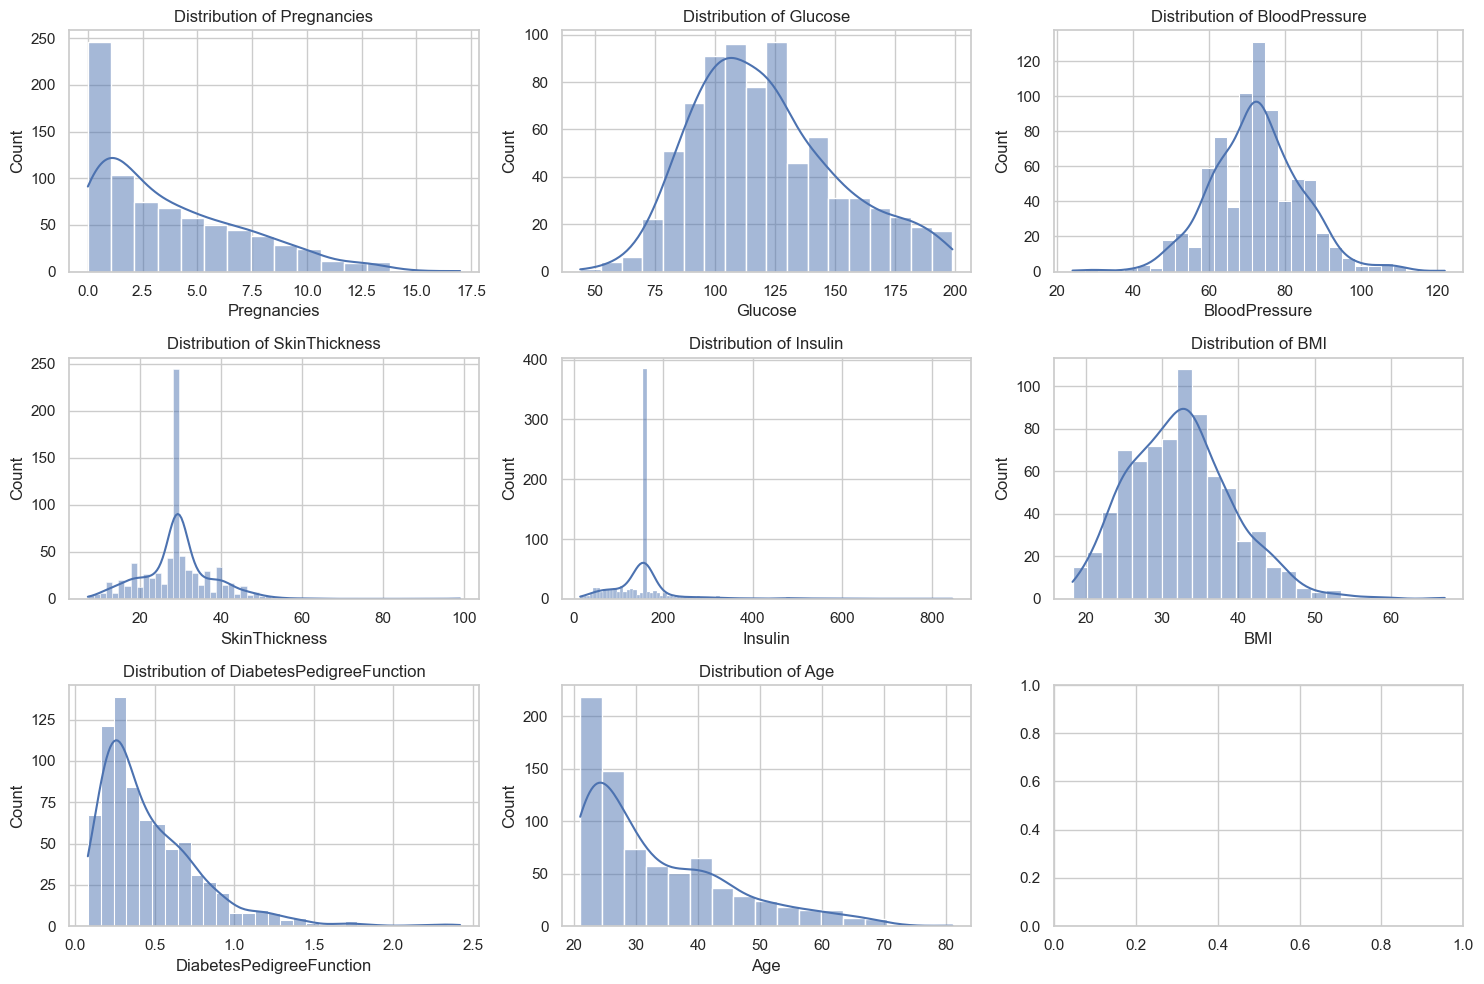

In [8]:
sns.set(style="whitegrid")

# Create a figure and axis for the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop through each column (excluding the 'Outcome' column)
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

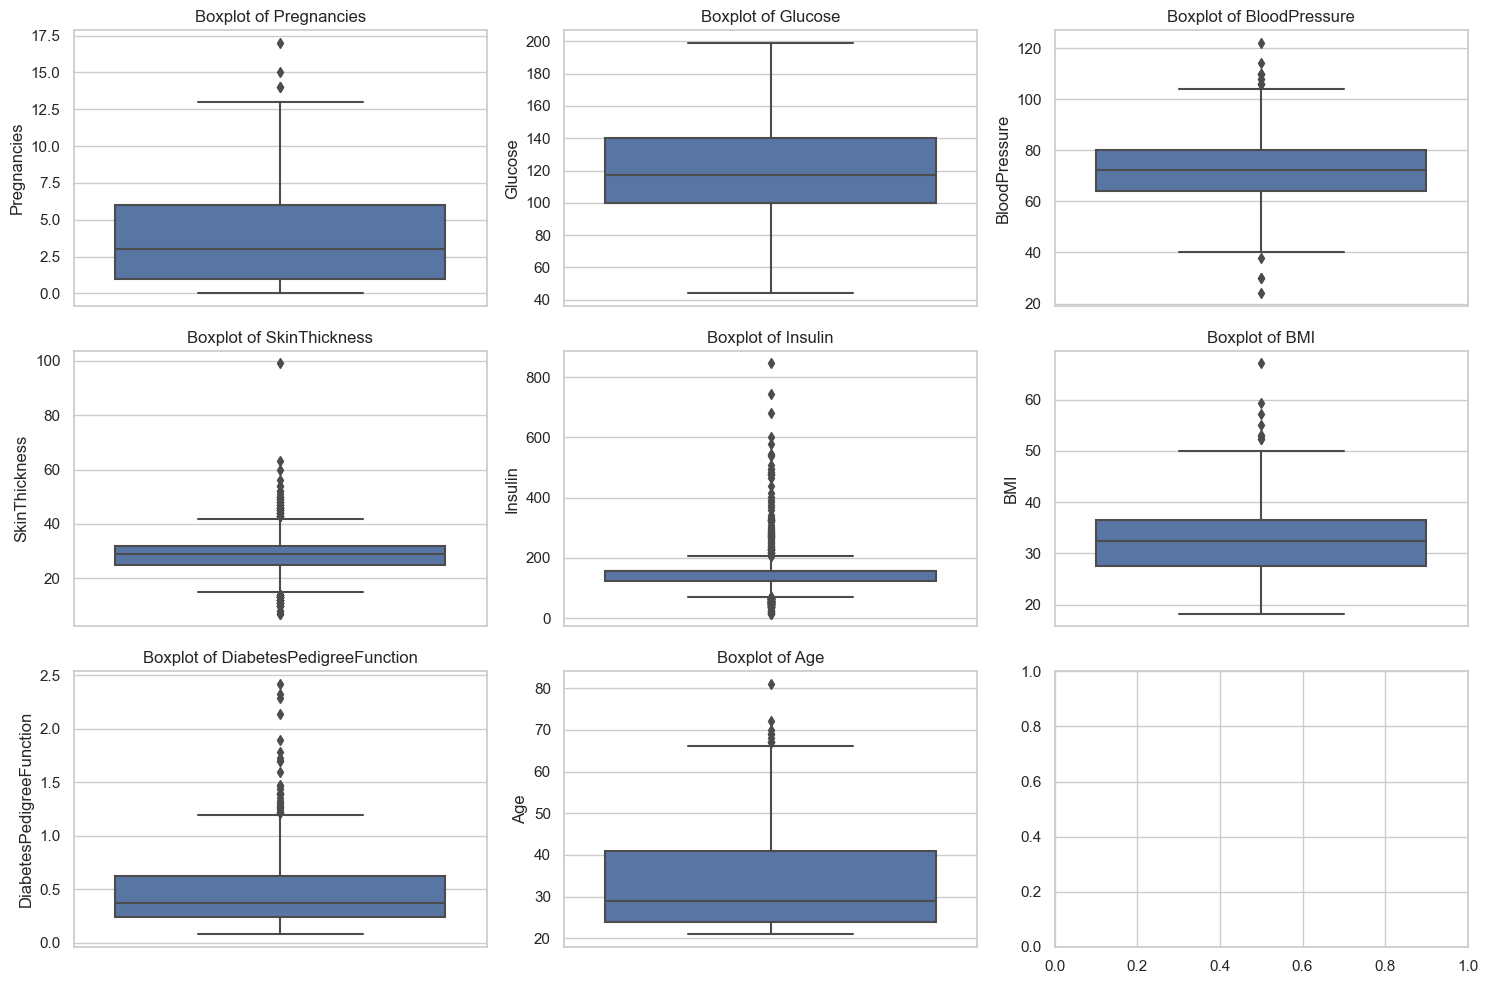

In [9]:
# Create a figure and axis for the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()   

# Loop through each column (excluding the 'Outcome' column)
for i, column in enumerate(df.columns):
    # Exclude the 'Outcome' column
    if column != 'Outcome':
        # Create a boxplot for the current column
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')
        
# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [10]:
df['BMI_to_Age_Ratio'] = df['BMI'] / df['Age']

In [11]:
df['Glucose_Insulin_Mean'] = df[['Glucose', 'Insulin']].mean(axis=1)

In [12]:
# Define the bins and labels for insulin categories (Normal and Abnormal)
insulin_bins = [0, 200, 10000]  # Adjust the bin edges as needed
insulin_labels = ['Normal', 'Abnormal']

# Create the 'Insulin_Category' feature
df['Insulin_Category'] = pd.cut(df['Insulin'], bins=insulin_bins, labels=insulin_labels)

In [13]:
# Define the bins and labels for age categories
age_bins = [0, 12, 20, 30, 50, 100]
age_labels = ['Children', 'Teenagers', 'Young Adults', 'Middle-Aged', 'Senior Citizens']

# Create the 'Age_Category' feature
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [14]:
# Define the bins and labels for blood pressure categories
blood_pressure_bins = [0, 80, 89, 120, 130, 1000]
blood_pressure_labels = ['Low', 'Normal', 'Elevated', 'High Stage 1', 'High Stage 2']

# Create the 'BloodPressure_Category' feature
df['BloodPressure_Category'] = pd.cut(df['BloodPressure'], bins=blood_pressure_bins, labels=blood_pressure_labels)

In [15]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
bmi_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese (Class I)', 'Obese (Class II)']

df['BMI_Category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

In [16]:
# Creating the one hot encode function
def one_hot_encode(data, column, prefix=None):
    encoded = pd.get_dummies(data[column], drop_first = True, prefix=prefix)        
    data = data.drop(column,axis = 1)
    data = data.join(encoded)
    return data

In [17]:
# Applying one hot encode on the categorical data
df = one_hot_encode(df, 'Age_Category','Age')
df = one_hot_encode(df, 'BMI_Category', 'BMI')
df = one_hot_encode(df, 'BloodPressure_Category', 'BloodPressure')
df = one_hot_encode(df, 'Insulin_Category', 'Insulin')

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome', 'Pregnancies','SkinThickness'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
df = scaler.fit_transform(df)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

param_grid = {
    'max_depth': [2, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random'],
}

clf = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print(best_params)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}


In [21]:
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']
best_min_criterion = best_params['criterion']
best_min_max_features = best_params['max_features']
best_min_splitter = best_params['splitter']

clf = DecisionTreeClassifier(random_state=0, criterion=best_min_criterion, max_depth=best_max_depth, 
                                                                  min_samples_split=best_min_samples_split, 
                                                                  min_samples_leaf=best_min_samples_leaf,
                                                                  max_features=best_min_max_features,
                                                                  splitter=best_min_splitter,
                                                                  ccp_alpha=0.01)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7,
                       min_samples_leaf=2, min_samples_split=5, random_state=0,
                       splitter='random')

In [22]:
# Access feature importances
feature_importances = clf.feature_importances_

# Print or visualize feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Glucose: 0.6102496561570216
BloodPressure: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
BMI_to_Age_Ratio: 0.0
Glucose_Insulin_Mean: 0.0
Age_Teenagers: 0.0
Age_Young Adults: 0.22654308864443823
Age_Middle-Aged: 0.0
Age_Senior Citizens: 0.0
BMI_Normal Weight: 0.13851842976969828
BMI_Overweight: 0.024688825428841762
BMI_Obese (Class I): 0.0
BMI_Obese (Class II): 0.0
BloodPressure_Normal: 0.0
BloodPressure_Elevated: 0.0
BloodPressure_High Stage 1: 0.0
BloodPressure_High Stage 2: 0.0
Insulin_Abnormal: 0.0


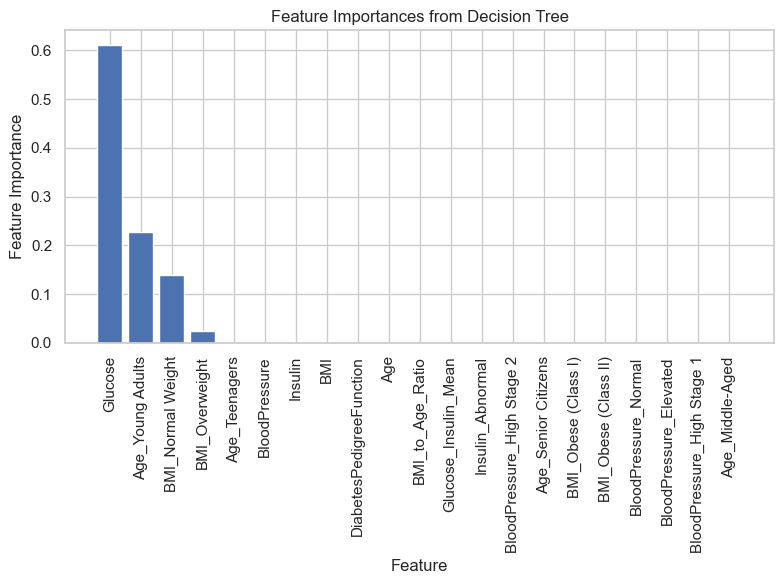

In [23]:
import matplotlib.pyplot as plt

# Assuming you have already calculated feature_importances and have a list of feature names (X.columns)
features = X.columns
importance_values = clf.feature_importances_

# Sort the features and importances in descending order
sorted_indices = importance_values.argsort()[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [importance_values[i] for i in sorted_indices]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_features)), sorted_importances, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances from Decision Tree')
plt.tight_layout()
plt.show()


In [24]:
y_preds = clf.predict(X_test)

In [25]:
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

Accuracy 0.7727
Precision 0.7000
Recall 0.6364
F1 0.6667


In [30]:
from sklearn.tree import export_graphviz
import graphviz
# Visualize the decision tree (partial view)
dot_data = export_graphviz(
    clf, out_file=None, 
    feature_names=list(X_test.columns),
    class_names=['No Diabetes', 'Diabetes'],
    filled=True, rounded=True, special_characters=True
)

# Create a Graphviz graph from the DOT data and display it (you may need to adjust the view)
graph = graphviz.Source(dot_data)
graph.view("decision_tree")  # This will save and open the visualization as "decision_tree.pdf"

'decision_tree.pdf'

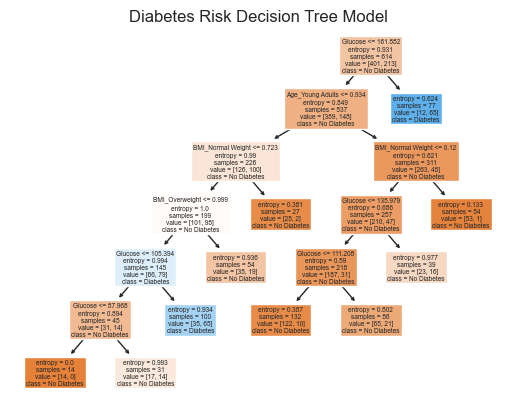

In [27]:

# Use the plot_tree function with adjusted parameters
plot_tree(clf,
          feature_names=list(X.columns),
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          )

# Add a title
plt.title("Diabetes Risk Decision Tree Model")

# Show the plot
plt.show()

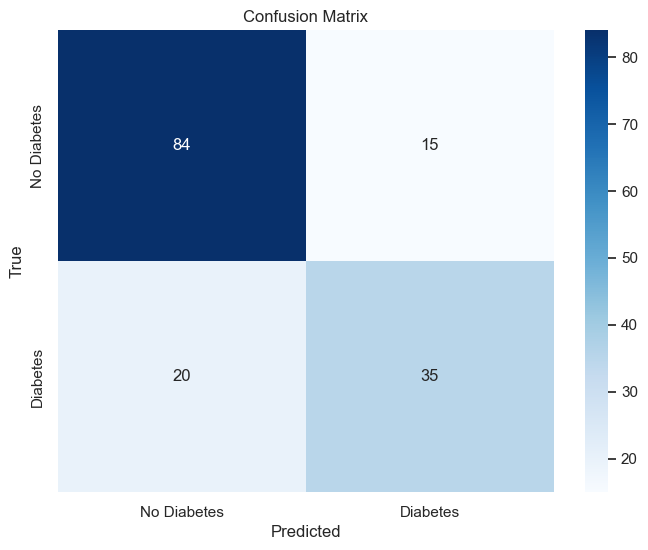

In [28]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

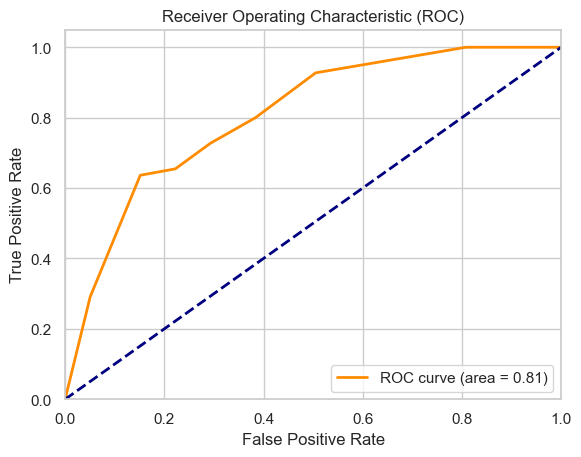

In [29]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()